# LOGISTIC REGRESSION 
### (Classification algorithm)
#### Single Feature/Variable

Logistic Regression is a classification algorithm and helps to classify data. It gives ***DISCRETE VALUES AS OUTPUT***. Don't confuse with the term regression in it's name. In ML regression means a function which gives continuos value as output. But this one, is a classification algorithm.

####  Hypothesis function:
In logistic regression the hypothesis function is $h_{\theta}(x)$ = $1/(1+$ $e^{-\theta x}$ $)$.

And it's values always lies between 0 and 1.

I will frame a simple dataset for testing our function.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

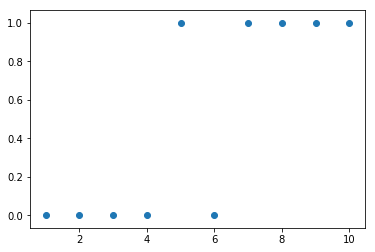

In [35]:
x1 = np.arange(1,11)
y1 = np.array([0,0,0,0,1,0,1,1,1,1])
plt.scatter(x1,y1)

So this is our data for the classification problem. Now let us write an algoritm to predict a logistic regression model.

In [34]:
def Gradient_Descent(x, y, learning_rate, iterations):
    theta_0,theta_1 = 0.001,0.001
    m = x.shape[0]

    def mean_error(a, b):
      sum_mean = 0
      for i in range(m):
        sum_mean+= a[i] - b[i]
      return sum_mean/m

    cost_func = []
    
    def cal_cost_func(t_0,t_1,h_xi):
        sum = 0
        for i in range(m):
            sum += y[i]*math.log(h_xi[i]) + (1-y[i])*math.log(1-h_xi[i])
        return -sum/m

    
    def perform_cal(theta_0,theta_1, m):
        h_xi = np.ones((m))
        for i in range(m):
            h_xi[i] = (1/(1 + math.pow(math.e,-(theta_0 + theta_1*x[i]))))
        cost_func_curr = (cal_cost_func(theta_0,theta_1, h_xi))
        cost_func.append(cost_func_curr)
        temp_0 = theta_0 - learning_rate*mean_error( h_xi, y)
        temp_1 = theta_1 - learning_rate*mean_error(h_xi*x, y*x)
        return temp_0 , temp_1

    for i in range(iterations):
        theta_0, theta_1 = perform_cal(theta_0, theta_1, m)
        
    return theta_0,theta_1, cost_func

-6.393068781956088 1.170504377336995
x =  5.461806812291387


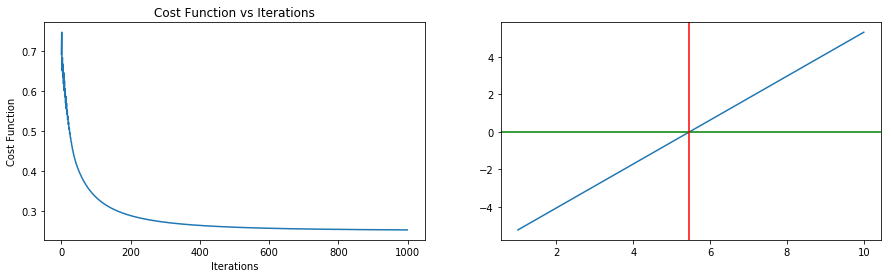

In [59]:
itr = 1000
t_0,t_1, cost_func = Gradient_Descent(x1, y1, 0.3, itr)
a = np.arange(itr)
print(t_0,t_1)
fig, (ax1,ax2) = plt.subplots(nrows=1,ncols=2)
fig.set_figwidth(15)
ax1.plot(np.arange(itr), cost_func)
ax1.set(xlabel='Iterations', ylabel='Cost Function')
ax1.set_title('Cost Function vs Iterations')
ax2.plot(x1, t_0+t_1*x1)
ax2.axhline(y=0, color='g')
ax2.axvline(x=(-t_0/t_1), color='r', linestyle='-')  #plotting a vertical line
print('x = ', (-t_0/t_1))

So the cost function decreases as the number of iterations increases, hence we are on a good track. Now, the second plot is the line which shows the model predicted by logistic regression algorithm. 

***Intrepretation of the model :***

1) We see that at x = 5.46 the value of y=0 for this line, hence it means that when passed with a number less than 5.46, the algorithm would give us 0 as output. Which is quite obvious if we see the data set made by us.

2) For values greater than x = 5.46, it would give 1 as output.

A function to check all the numbers fro 1 to 10, to be classified as 0 or 1.

In [66]:
def predict(x,t0,t1):
    y_pred = t0 + t1*x
    if y_pred<0:
        return 0
    return 1

for i in range(1,11):
    print(predict(i, t_0,t_1), end=' ')

0 0 0 0 0 1 1 1 1 1 

Now that's a very correct prediction. Notice that the data at x=6, y=0 in our datset doesn't affect the predicted model alot. As even we can predict that it is by chance.

***Matrix form calculations are very powerful. When writing functions like these it is very helpful to use numpy ndarrays (N-dimensional arrays) as it makes it easy to understand ,time-efficient and takes less number of lines***

In [63]:
def Gradient_Descent_Matrices_Magic(x, y, l_t, itr):
    theta = np.array([0.001,0.001]).reshape(1,2)
    m = x.shape[0]
    y,x = y.reshape(m,1), x.reshape(m,1)
    x = np.concatenate((np.ones((m,1)),x), axis=1)

    for i in range(itr):
        h_xi = (1/(1 + np.exp(-np.dot(x,np.transpose(theta)))))
        theta = theta - (l_t/m) * np.dot(np.transpose(h_xi- y) , x)
    
    return theta

In [69]:
theta_m= Gradient_Descent_Matrices_Magic(x1,y1,0.3,1000)
for i in range(1,11):
    print(predict(i, theta_m[0,0], theta_m[0,1]), end=' ')

0 0 0 0 0 1 1 1 1 1 

Hence this one also predicts the same result. But the code of the function Gradient_Descent_Matrices_Magic is very short. Hence it is a good practice to write it this way.